📌 **Summary (Image Compression with PCA & Autoencoders)**
Key Points:

- Dataset: MNIST handwritten digits.

**Techniques Used:**

- PCA: Linear dimensionality reduction by keeping top 100 components.

- Autoencoder: Deep neural network with a bottleneck layer of 64 dimensions for nonlinear compression.

**Results:**

- PCA reconstruction captures global structure but loses finer details.
- Autoencoder produces sharper reconstructions by learning nonlinear mappings.

**Real-World Impact:**
Reduces storage requirements.
Speeds up transmission of images.
Useful in mobile apps, IoT, and cloud storage optimization.

### Step 1: Import Libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

### Step 2: Load Dataset

In [10]:
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Training data shape:", X_train.shape)
print("Flattened training data shape:", X_train_flat.shape)

Training data shape: (60000, 28, 28)
Flattened training data shape: (60000, 784)


## PART A: PCA Compression
### Step 3: Apply PCA


In [11]:
pca = PCA(n_components=100)  # keep 100 dimensions
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Reconstruct images
X_train_pca_recon = pca.inverse_transform(X_train_pca)
X_test_pca_recon = pca.inverse_transform(X_test_pca)

### Step 4: Visualize PCA Reconstruction


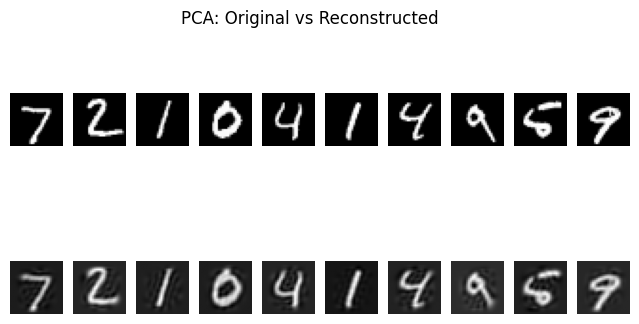

In [12]:
plt.figure(figsize=(8, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis("off")
    
    # PCA Reconstructed
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test_pca_recon[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.suptitle("PCA: Original vs Reconstructed")
plt.show()

## PART B: Autoencoder Compression
### Step 5: Build Autoencoder


In [13]:
encoding_dim = 64  # compressed size

input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(encoding_dim, activation="relu")(encoded)

decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# Compile Model
autoencoder.compile(optimizer=Adam(), loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train Autoencoder


In [22]:
autoencoder.fit(
    X_train_flat, X_train_flat,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_flat, X_test_flat),
    verbose=1
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0831 - val_loss: 0.0819
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0823 - val_loss: 0.0811
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0815 - val_loss: 0.0804
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0809 - val_loss: 0.0798
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0802 - val_loss: 0.0795
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0797 - val_loss: 0.0787
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0791 - val_loss: 0.0785
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0787 - val_loss: 0.0780
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0783 - val_loss: 0.0776
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - val_loss: 0.0770
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0776 - val_loss: 0.0769
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [23]:
# Step 7: Reconstruct Images
X_test_ae_recon = autoencoder.predict(X_test_flat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step


### Step 8: Visualize Autoencoder Reconstruction


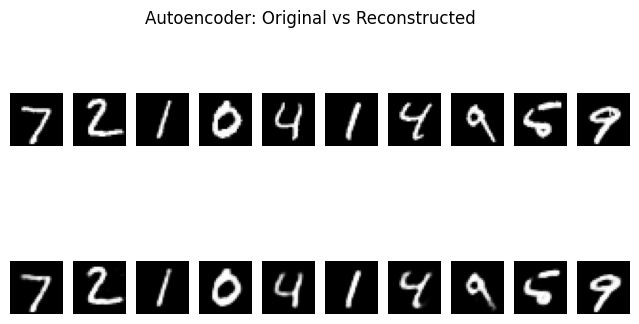

In [24]:
plt.figure(figsize=(8, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis("off")
    
    # Autoencoder Reconstructed
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test_ae_recon[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.suptitle("Autoencoder: Original vs Reconstructed")
plt.show()


### Compare PCA vs Autoencode result

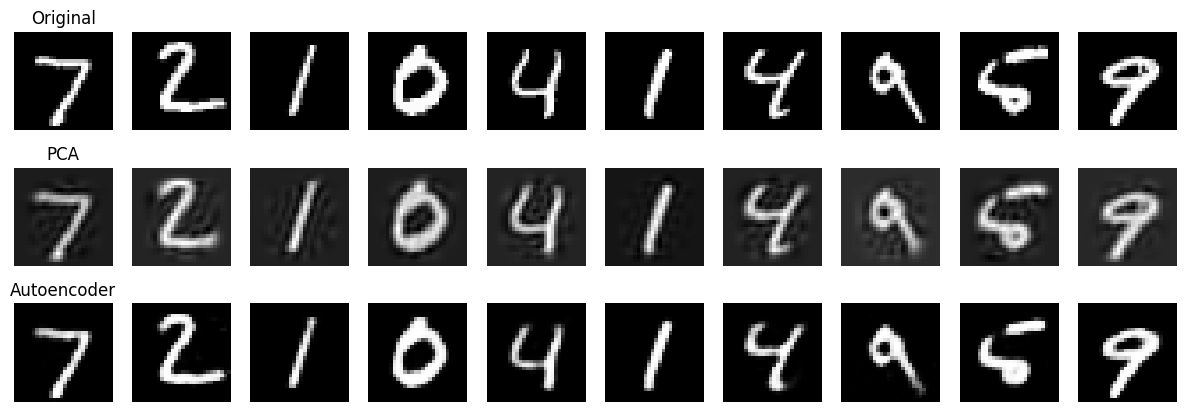

In [25]:
n = 10  # number of images to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("Original")

    # PCA
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_pca_recon[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("PCA")

    # Autoencoder
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test_ae_recon[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_title("Autoencoder")

plt.show()